In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (12,8)

In [2]:
# Read the train data.
data = pd.read_csv('train.csv')
data.head()

C:\Users\admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,4,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,vendor+AF8-id,pickup+AF8-loc,drop+AF8-loc,driver+AF8-tip,mta+AF8-tax,distance,pickup+AF8-time,drop+AF8-time,num+AF8-passengers,toll+AF8-amount,payment+AF8-method,rate+AF8-code,stored+AF8-flag,extra+AF8-charges,improvement+AF8-charge,total+AF8-amount
0,0,1,170.0,233.0,1.83,0.5,0.70,04/04/2017 05:59:43 PM,04/04/2017 06:05:04 PM,1.0,0,1.0,1.0,N,1,0.3,9.13
1,1,2,151.0,243.0,3.56,0.5,4.64,04/03/2017 07:03:34 PM,04/03/2017 07:20:04 PM,1.0,0,1.0,1.0,N,1,0.3,21.36
2,2,2,68.0,90.0,1.5,0.5,1.29,04/03/2017 03:06:13 PM,04/03/2017 03:12:30 PM,2.0,0,1.0,1.0,N,0,0.3,8.8
3,3,2,142.0,234.0,1.5,0.5,2.74,04/04/2017 08:10:52 AM,04/04/2017 08:27:00 AM,1.0,0,1.0,1.0,N,0,0.3,14.8
4,4,2,238.0,238.0,0,0.5,0.45,04/05/2017 02:02:59 PM,04/05/2017 02:05:41 PM,6.0,0,2.0,1.0,N,0,0.3,4.8


### Column Description
1. ID - Unique Identifier
2. vendor_id - Taxi data providing vendor; 1 = TaxiTech Inc. 2 = DataCollectors Inc.
3. pickup_loc - Location ID from where passenger was picked up
4. drop_loc - Location ID where passenger was dropped
5. driver_tip - Tip given to driver
6. mta_tax - Automatically triggered tax amount
7. distance - Distance covered in the trip
8. pickup_time - Date/Time when meter started
9. drop_time - Date/Time when meter stopped
10. num_passengers - Cab passenger count
11. toll_Amt - Toll paid in the booths
13. 12. payment_Method - Method of payment symbolised by a numeric code (1 = Credit Card, 2 = Cash, 3 = Free ride, 4 = Disputed, 5 = Unknown, 6 = Void trip)
14. rate_code - Rate code for the trip (1 = Standard, 2 = Airport, 3 = Connaught Place, 4 = Noida, 5 = Negotiated Fare, 6 = Pooled ride)
15. stored_flag - Flag which signifies whether trip data was immediately sent to Chh-OLA’s database or not (Y=Yes, N=No, because of connection error)
16. extra_charges - Miscellaneous charges
17. improvement_charge - Charge levied for improvement in infrastructure
18. total_amount - Output label; Final amount to be paid including meter fare and all extra charges

In [3]:
# Found that there is some text entry present in data, remove it.
cols = data.columns
new_cols = []
for col in cols:
    new_cols.append(col.replace('+AF8-',' '))

data.columns = new_cols
data.head()

,ID,vendor id,pickup loc,drop loc,driver tip,mta tax,distance,pickup time,drop time,num passengers,toll amount,payment method,rate code,stored flag,extra charges,improvement charge,total amount
0,0,1,170.0,233.0,1.83,0.5,0.70,04/04/2017 05:59:43 PM,04/04/2017 06:05:04 PM,1.0,0,1.0,1.0,N,1,0.3,9.13
1,1,2,151.0,243.0,3.56,0.5,4.64,04/03/2017 07:03:34 PM,04/03/2017 07:20:04 PM,1.0,0,1.0,1.0,N,1,0.3,21.36
2,2,2,68.0,90.0,1.5,0.5,1.29,04/03/2017 03:06:13 PM,04/03/2017 03:12:30 PM,2.0,0,1.0,1.0,N,0,0.3,8.8
3,3,2,142.0,234.0,1.5,0.5,2.74,04/04/2017 08:10:52 AM,04/04/2017 08:27:00 AM,1.0,0,1.0,1.0,N,0,0.3,14.8
4,4,2,238.0,238.0,0,0.5,0.45,04/05/2017 02:02:59 PM,04/05/2017 02:05:41 PM,6.0,0,2.0,1.0,N,0,0.3,4.8


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ID                  1048575 non-null  int64  
 1   vendor id           1048575 non-null  object 
 2   pickup loc          1048574 non-null  float64
 3   drop loc            1048574 non-null  float64
 4   driver tip          1048573 non-null  object 
 5   mta tax             1048574 non-null  object 
 6   distance            1048574 non-null  float64
 7   pickup time         1048574 non-null  object 
 8   drop time           1048574 non-null  object 
 9   num passengers      1048574 non-null  float64
 10  toll amount         1048573 non-null  object 
 11  payment method      1048574 non-null  float64
 12  rate code           1048574 non-null  float64
 13  stored flag         1048574 non-null  object 
 14  extra charges       1048574 non-null  object 
 15  improvement cha

In [6]:
# https://stackoverflow.com/questions/54313463/pandas-datetime-to-unix-timestamp-seconds
data['pickup time'] = pd.to_datetime(data['pickup time'])
data['drop time'] = pd.to_datetime(data['drop time'])

In [7]:
# Drop all the missing values.
data.dropna(inplace=True)

In [8]:
print('The earliest date is {} and the last date is {}'.format(data['pickup time'].min(), data['pickup time'].max()))

The earliest date is 2017-04-03 06:53:27 and the last date is 2017-04-30 19:17:29


So we see that we have data for about a month. We will use this data to predict the total fares.

1. If we plot the pickups based on the date and time, we expect to see that there will be some daily pattern of demand and similarly the pattern will affect the price of ride.
2. General expectations are- longer rides will cost more, pickups from busy locations will have more cost.
3. We can use clustering on pickup location to find which pickup spots generally lead to higher fares.
4. Similarly for drop locations, we can find which drop locations have higher fares associated with them.
5. We could also maybe find a pattern in the tips based on pickup locations. Generally people from posh regions would tip the driver.
6. Number of passengers would also be useful in determining if a ride is sedan or suv as passengers more than 3 would have to take a suv.
7. The pickup time will be useful if we add time of the day feature. morning 6-11, afternoon 11-3, evening 3-8, night 8-12, late night 12-6. We should plot the data and see what times we get.


In [9]:
# split the date in day of month, hour.
data['pickup day'] = data['pickup time'].dt.day
data['drop day'] = data['drop time'].dt.day
data['pickup hr'] = data['pickup time'].dt.hour
data['drop hr'] = data['drop time'].dt.hour
data['day_of_week'] = data['pickup time'].dt.dayofweek

# EDA

In [10]:
data.groupby('pickup day').count()

,ID,vendor id,pickup loc,drop loc,driver tip,mta tax,distance,pickup time,drop time,num passengers,...,payment method,rate code,stored flag,extra charges,improvement charge,total amount,drop day,pickup hr,drop hr,day_of_week
pickup day,,,,,,,,,,,,,,,,,,,,,
3,188951,188951,188951,188951,188951,188951,188951,188951,188951,188951,...,188951,188951,188951,188951,188951,188951,188951,188951,188951,188951
4,228223,228223,228223,228223,228223,228223,228223,228223,228223,228223,...,228223,228223,228223,228223,228223,228223,228223,228223,228223,228223
5,238296,238296,238296,238296,238296,238296,238296,238296,238296,238296,...,238296,238296,238296,238296,238296,238296,238296,238296,238296,238296
6,247209,247209,247209,247209,247209,247209,247209,247209,247209,247209,...,247209,247209,247209,247209,247209,247209,247209,247209,247209,247209
7,135032,135032,135032,135032,135032,135032,135032,135032,135032,135032,...,135032,135032,135032,135032,135032,135032,135032,135032,135032,135032
30,10862,10862,10862,10862,10862,10862,10862,10862,10862,10862,...,10862,10862,10862,10862,10862,10862,10862,10862,10862,10862


We see that the data available for date 30 is very less. Also data is only available from 3-7 and from 8-29 is not available.

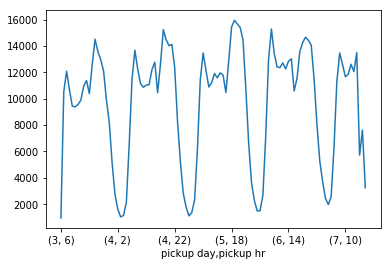

In [11]:
# plot pickups per hour ie demand per hour.
pickups_per_hr = data.sort_values(by='pickup time').groupby(['pickup day','pickup hr']).count()
pickups_per_hr['distance'].plot()

In [22]:
price_per_hr = data.sort_values(by='pickup time').groupby(['pickup day','pickup hr']).sum()
price_per_hr

ID  pickup loc   drop loc  distance  \
pickup day pickup hr                                                
3          6           504982008    155512.0   152940.0   3200.06   
           7          5485051660   1707925.0  1710706.0  29415.00   
           8          6366634416   1976627.0  1973828.0  31428.67   
           9          5550839819   1747662.0  1754649.0  28692.43   
           10         4926487969   1554541.0  1550443.0  26497.82   
...                          ...         ...        ...       ...   
7          13         6317369518   2013549.0  1979542.0  36710.67   
           14         7081688185   2257785.0  2236112.0  39523.62   
           15         2987857943    969798.0   952218.0  16967.56   
30         18         4015457760   1242587.0  1237116.0  23579.51   
           19         1705401803    526827.0   528948.0   9696.45   

                      num passengers  payment method  rate code  drop day  \
pickup day pickup hr                                                        
3          6                  1395.0          1284.0     1000.0      2878   
           7                 16269.0         13568.0    10960.0     31556   
           8                 18557.0         15304.0    12361.0     36245   
           9                 16708.0         13970.0    10974.0     32003   
           10                15063.0         12823.0     9951.0     28304   
...                              ...             ...        ...       ...   
7          13                19219.0         16378.0    12715.0     84373   
           14                21737.0         18386.0    14214.0     94489   
           15                 9203.0          7778.0     6036.0     40048   
30         18                12501.0         10280.0     7980.0    228162   
           19                 5399.0          4418.0     3391.0     97060   

                      drop hr  day_of_week  
pickup day pickup hr                        
3          6             6590            0  
           7            76179            0  
           8            99488            0  
           9            98404            0  
           10           96593            0  
...                       ...          ...  
7          13          159930        48200  
           14          192787        53972  
           15           86222        22880  
30         18          139848        45702  
           19           61708        19470  

[108 rows x 10 columns]

In [24]:
dc_component = pickups_per_hr['distance'].mean()
freq = np.fft.fftfreq(len(pickups_per_hr['distance']))
n = len(freq)

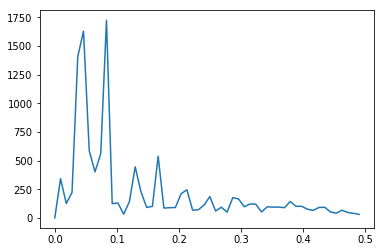

In [25]:
fft_vals = np.fft.fft(pickups_per_hr['distance']-dc_component)/len(pickups_per_hr['distance'])
plt.plot(freq[:int(n/2)], abs(fft_vals)[:int(n/2)])

([<matplotlib.axis.XTick at 0x27981778f98>,
 <a list of 24 Text xticklabel objects>)

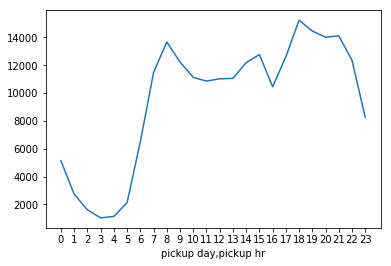

In [26]:
# Plot hourly data for one day
pickups_one_day = data.loc[data['pickup day']==4].sort_values(by='pickup time').groupby(['pickup day','pickup hr']).count()
pickups_one_day['distance'].plot()
plt.xticks(np.arange(0,24,1), np.arange(0,24,1))

### These will be our thresholds to bin the data based on time of the day.
early morning = 5-8
morning = 9-11
afternoon = 12-15
evening = 16-19
night = 20-23
late night = 0-4

In [27]:
data.drop(data[data['distance']==0].index, inplace=True)

In [28]:
import seaborn as sns

In [29]:
data.columns

Index(['ID', 'vendor id', 'pickup loc', 'drop loc', 'driver tip', 'mta tax',
       'distance', 'pickup time', 'drop time', 'num passengers', 'toll amount',
       'payment method', 'rate code', 'stored flag', 'extra charges',
       'improvement charge', 'total amount', 'pickup day', 'drop day',
       'pickup hr', 'drop hr', 'day_of_week'],
      dtype='object')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041713 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   ID                  1041713 non-null  int64         
 1   vendor id           1041713 non-null  object        
 2   pickup loc          1041713 non-null  float64       
 3   drop loc            1041713 non-null  float64       
 4   driver tip          1041713 non-null  object        
 5   mta tax             1041713 non-null  object        
 6   distance            1041713 non-null  float64       
 7   pickup time         1041713 non-null  datetime64[ns]
 8   drop time           1041713 non-null  datetime64[ns]
 9   num passengers      1041713 non-null  float64       
 10  toll amount         1041713 non-null  object        
 11  payment method      1041713 non-null  float64       
 12  rate code           1041713 non-null  float64       
 13  stored flag 

In [31]:
cat_cols = ['driver tip', 'mta tax', 'toll amount',
       'payment method', 'rate code', 'extra charges',
       'improvement charge', 'total amount']

for col in cat_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041713 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   ID                  1041713 non-null  int64         
 1   vendor id           1041713 non-null  object        
 2   pickup loc          1041713 non-null  float64       
 3   drop loc            1041713 non-null  float64       
 4   driver tip          1041710 non-null  float64       
 5   mta tax             1041311 non-null  float64       
 6   distance            1041713 non-null  float64       
 7   pickup time         1041713 non-null  datetime64[ns]
 8   drop time           1041713 non-null  datetime64[ns]
 9   num passengers      1041713 non-null  float64       
 10  toll amount         1041711 non-null  float64       
 11  payment method      1041713 non-null  float64       
 12  rate code           1041713 non-null  float64       
 13  stored flag 

In [33]:
data.drop(['ID','vendor id','stored flag','drop day','drop hr'], axis=1, inplace=True)

In [34]:
data['trip_duration'] = data['drop time'] - data['pickup time']

In [35]:
#data.drop(['drop time','pickup time'], axis=1, inplace=True)

In [36]:
data[data.trip_duration==data['trip_duration'].max()]

,pickup loc,drop loc,driver tip,mta tax,distance,pickup time,drop time,num passengers,toll amount,payment method,rate code,extra charges,improvement charge,total amount,pickup day,pickup hr,day_of_week,trip_duration
517843,132.0,42.0,11.71,0.5,22.44,2017-04-03 08:12:10,2017-04-04 08:11:56,2.0,5.76,1.0,2.0,0.0,0.3,70.27,3,8,0,0 days 23:59:46


In [37]:
for q in range(91,100):
    print(np.percentile(data['trip_duration'],q))

1778999999999 nanoseconds
1863999999999 nanoseconds
1962999999999 nanoseconds
2081999999999 nanoseconds
2229999999999 nanoseconds
2413999999999 nanoseconds
2653999999999 nanoseconds
3008759999999 nanoseconds
3668999999999 nanoseconds


{'whiskers': [<matplotlib.lines.Line2D at 0x27983e5ae48>,
 'caps': [<matplotlib.lines.Line2D at 0x27983e61710>,
 'boxes': [<matplotlib.lines.Line2D at 0x27983e5a8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x27983e61fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27983e66470>],
 'means': []}

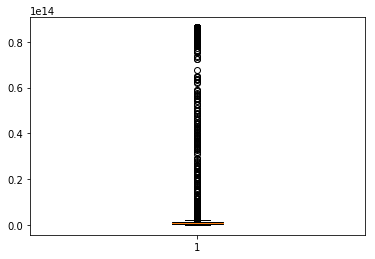

In [38]:
plt.boxplot(data['trip_duration'])

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


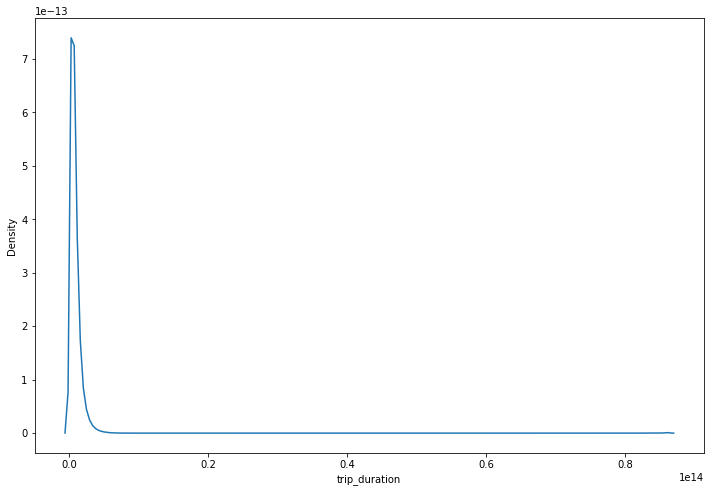

In [39]:
plt.figure(figsize=(12,8))
sns.kdeplot(pd.to_numeric(data['trip_duration']))

Most trip duration are short and very few are large.
We will plot them and see the inflection point to get the threshold.

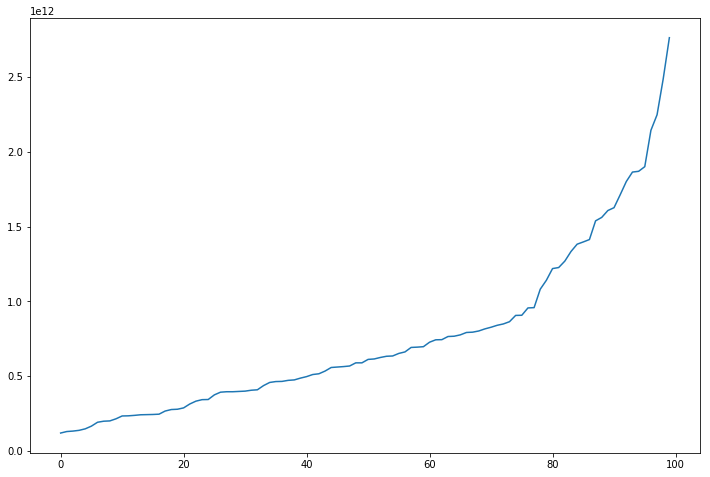

In [40]:
plt.figure(figsize=(12,8))
plt.plot(np.sort(data['trip_duration'][-100:]))

In [41]:
iqr = np.percentile(data['trip_duration'], 75) - np.percentile(data['trip_duration'], 25)
upperlim = np.percentile(data['trip_duration'], 75) + iqr
lowerlim = np.percentile(data['trip_duration'], 25) - iqr
print(lowerlim, upperlim)

-293000000000 nanoseconds 1795000000000 nanoseconds


In [42]:
pd.to_numeric(data['trip_duration']).loc[771496]/10**9

18.0

In [43]:
data['trip_duration'] = pd.to_numeric(data['trip_duration'])/10**9/60

In [44]:
data['velocity'] = data['distance']/pd.to_numeric(data['trip_duration'])
data

,pickup loc,drop loc,driver tip,mta tax,distance,pickup time,drop time,num passengers,toll amount,payment method,rate code,extra charges,improvement charge,total amount,pickup day,pickup hr,day_of_week,trip_duration,velocity
0,170.0,233.0,1.83,0.5,0.70,2017-04-04 17:59:43,2017-04-04 18:05:04,1.0,0.0,1.0,1.0,1.0,0.3,9.13,4,17,1,5.350000,0.130841
1,151.0,243.0,3.56,0.5,4.64,2017-04-03 19:03:34,2017-04-03 19:20:04,1.0,0.0,1.0,1.0,1.0,0.3,21.36,3,19,0,16.500000,0.281212
2,68.0,90.0,1.50,0.5,1.29,2017-04-03 15:06:13,2017-04-03 15:12:30,2.0,0.0,1.0,1.0,0.0,0.3,8.80,3,15,0,6.283333,0.205305
3,142.0,234.0,1.50,0.5,2.74,2017-04-04 08:10:52,2017-04-04 08:27:00,1.0,0.0,1.0,1.0,0.0,0.3,14.80,4,8,1,16.133333,0.169835
4,238.0,238.0,0.00,0.5,0.45,2017-04-05 14:02:59,2017-04-05 14:05:41,6.0,0.0,2.0,1.0,0.0,0.3,4.80,5,14,2,2.700000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,48.0,50.0,1.00,0.5,1.40,2017-04-06 23:17:09,2017-04-06 23:25:04,1.0,0.0,1.0,1.0,0.5,0.3,9.80,6,23,3,7.916667,0.176842
1048571,237.0,166.0,0.00,0.5,3.60,2017-04-06 10:58:47,2017-04-06 11:22:04,1.0,0.0,2.0,1.0,0.0,0.3,18.30,6,10,3,23.283333,0.154617
1048572,164.0,90.0,2.35,0.5,1.70,2017-04-06 22:03:42,2017-04-06 22:17:04,1.0,0.0,1.0,1.0,0.5,0.3,14.15,6,22,3,13.366667,0.127182
1048573,264.0,264.0,0.00,0.5,1.80,2017-04-06 18:43:22,2017-04-06 18:56:09,4.0,0.0,2.0,1.0,1.0,0.3,11.80,6,18,3,12.783333,0.140808


In [45]:
data.sort_values(by='trip_duration')[-100:]

,pickup loc,drop loc,driver tip,mta tax,distance,pickup time,drop time,num passengers,toll amount,payment method,rate code,extra charges,improvement charge,total amount,pickup day,pickup hr,day_of_week,trip_duration,velocity
441733,236.0,239.0,2.56,0.5,1.37,2017-04-07 12:11:19,2017-04-08 12:09:41,1.0,0.00,1.0,1.0,0.0,0.3,15.36,7,12,4,1438.366667,0.000952
761983,161.0,234.0,1.66,0.5,1.33,2017-04-06 17:11:09,2017-04-07 17:09:31,1.0,0.00,1.0,1.0,1.0,0.3,9.96,6,17,3,1438.366667,0.000925
82694,234.0,211.0,0.00,0.5,1.49,2017-04-03 16:55:32,2017-04-04 16:53:54,1.0,0.00,1.0,1.0,1.0,0.3,12.30,3,16,0,1438.366667,0.001036
597382,164.0,246.0,2.56,0.5,1.42,2017-04-03 17:09:56,2017-04-04 17:08:20,3.0,0.00,1.0,1.0,1.0,0.3,15.36,3,17,0,1438.400000,0.000987
782005,142.0,143.0,0.53,0.5,0.41,2017-04-07 15:12:53,2017-04-08 15:11:18,1.0,0.00,1.0,1.0,0.0,0.3,5.83,7,15,4,1438.416667,0.000285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249270,246.0,163.0,1.13,0.5,1.78,2017-04-04 16:14:03,2017-04-05 16:13:34,1.0,0.00,1.0,1.0,1.0,0.3,12.43,4,16,1,1439.516667,0.001237
291479,186.0,88.0,0.00,0.5,4.26,2017-04-07 08:13:01,2017-04-08 08:12:36,2.0,0.00,2.0,1.0,0.0,0.3,17.80,7,8,4,1439.583333,0.002959
150894,161.0,132.0,0.00,0.5,16.88,2017-04-07 13:24:24,2017-04-08 13:24:02,1.0,0.00,2.0,2.0,0.0,0.3,52.80,7,13,4,1439.633333,0.011725
936392,261.0,132.0,0.00,0.5,19.99,2017-04-04 08:51:32,2017-04-05 08:51:11,1.0,0.00,2.0,2.0,0.0,0.3,52.80,4,8,1,1439.650000,0.013885


We see that few trips have velocity less than 0.0001 this means that there is some error in recording the trip duration or the distance. We will remove such entries.

In [46]:
#1041306
clean_data = data.drop(data[data['velocity']<=0.009].index)
clean_data.dropna(inplace=True)
clean_data.shape

(1039850, 19)

In [47]:
print('remaining % data is ', clean_data.shape[0]*100/1041306)

remaining % data is  99.86017558719531


In [48]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1039850 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   pickup loc          1039850 non-null  float64       
 1   drop loc            1039850 non-null  float64       
 2   driver tip          1039850 non-null  float64       
 3   mta tax             1039850 non-null  float64       
 4   distance            1039850 non-null  float64       
 5   pickup time         1039850 non-null  datetime64[ns]
 6   drop time           1039850 non-null  datetime64[ns]
 7   num passengers      1039850 non-null  float64       
 8   toll amount         1039850 non-null  float64       
 9   payment method      1039850 non-null  float64       
 10  rate code           1039850 non-null  float64       
 11  extra charges       1039850 non-null  float64       
 12  improvement charge  1039850 non-null  float64       
 13  total amount

In [49]:
# fucntion to convert hour of day to time of day.
# early morning = 5-8 morning = 9-11 afternoon = 12-15 evening = 16-19 night = 20-23 late night = 0-4
def convert_hr_time(hr):
    if hr in range(5,9):
        return 0
    if hr in range(9,12):
        return 1
    if hr in range(12,16):
        return 2
    if hr in range(16,20):
        return 3
    if hr in range(20,24):
        return 4
    if hr in range(0,5):
        return 5

In [50]:
clean_data.drop(['pickup loc','drop loc','pickup time','drop time','pickup day','day_of_week'], axis=1, inplace=True)


In [51]:
clean_data['time_of_day'] = clean_data['pickup hr'].apply(convert_hr_time)

In [52]:
clean_data

,driver tip,mta tax,distance,num passengers,toll amount,payment method,rate code,extra charges,improvement charge,total amount,pickup hr,trip_duration,velocity,time_of_day
0,1.83,0.5,0.70,1.0,0.0,1.0,1.0,1.0,0.3,9.13,17,5.350000,0.130841,3
1,3.56,0.5,4.64,1.0,0.0,1.0,1.0,1.0,0.3,21.36,19,16.500000,0.281212,3
2,1.50,0.5,1.29,2.0,0.0,1.0,1.0,0.0,0.3,8.80,15,6.283333,0.205305,2
3,1.50,0.5,2.74,1.0,0.0,1.0,1.0,0.0,0.3,14.80,8,16.133333,0.169835,0
4,0.00,0.5,0.45,6.0,0.0,2.0,1.0,0.0,0.3,4.80,14,2.700000,0.166667,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1.00,0.5,1.40,1.0,0.0,1.0,1.0,0.5,0.3,9.80,23,7.916667,0.176842,4
1048571,0.00,0.5,3.60,1.0,0.0,2.0,1.0,0.0,0.3,18.30,10,23.283333,0.154617,1
1048572,2.35,0.5,1.70,1.0,0.0,1.0,1.0,0.5,0.3,14.15,22,13.366667,0.127182,4
1048573,0.00,0.5,1.80,4.0,0.0,2.0,1.0,1.0,0.3,11.80,18,12.783333,0.140808,3


C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


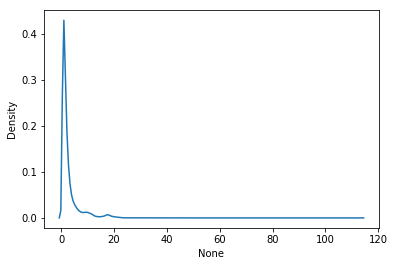

In [53]:
sns.kdeplot(clean_data['distance'].values)

In [54]:
# Function to indicate the trip length.
def trip_length(distance):
    if distance<=30:
        return 0
    if distance>30 and distance<=50:
        return 1
    if distance>50:
        return 2

In [55]:
clean_data['trip_length'] = clean_data['distance'].apply(trip_length)

In [56]:
clean_data.head()

,driver tip,mta tax,distance,num passengers,toll amount,payment method,rate code,extra charges,improvement charge,total amount,pickup hr,trip_duration,velocity,time_of_day,trip_length
0,1.83,0.5,0.70,1.0,0.0,1.0,1.0,1.0,0.3,9.13,17,5.350000,0.130841,3,0
1,3.56,0.5,4.64,1.0,0.0,1.0,1.0,1.0,0.3,21.36,19,16.500000,0.281212,3,0
2,1.50,0.5,1.29,2.0,0.0,1.0,1.0,0.0,0.3,8.80,15,6.283333,0.205305,2,0
3,1.50,0.5,2.74,1.0,0.0,1.0,1.0,0.0,0.3,14.80,8,16.133333,0.169835,0,0
4,0.00,0.5,0.45,6.0,0.0,2.0,1.0,0.0,0.3,4.80,14,2.700000,0.166667,2,0


In [57]:
clean_data['trip_length'].value_counts()

0    1039385
1        425
2         40
Name: trip_length, dtype: int64

In [58]:
# There are some trips that have same pickup time and drop time. Thus our trip duration becomes 0. But still there is data for
# distance. We can replace the velocity with the avg velocity and then calulate the missing duration.
clean_data.loc[clean_data['trip_duration']==0].shape

(25, 15)

In [59]:
# Find average velocity and use it to replace inf values.
avg_velocity = clean_data['velocity'].loc[clean_data['trip_duration']!=0].mean()
print('Avg velocity is ',avg_velocity)
clean_data['velocity'].loc[clean_data['trip_duration']==0].replace(np.inf, avg_velocity)

Avg velocity is  0.21483865294908322


43267     0.214839
45891     0.214839
140704    0.214839
141091    0.214839
249970    0.214839
275898    0.214839
285491    0.214839
316135    0.214839
352551    0.214839
364873    0.214839
387463    0.214839
422041    0.214839
526351    0.214839
581925    0.214839
623193    0.214839
646750    0.214839
751885    0.214839
804720    0.214839
807758    0.214839
866840    0.214839
871512    0.214839
909735    0.214839
920695    0.214839
952393    0.214839
999088    0.214839
Name: velocity, dtype: float64

In [60]:
# Find the trip duration using the distance and velocity.
clean_data['trip_duration'].loc[clean_data['trip_duration']==0] = clean_data['distance'].loc[clean_data['trip_duration']==0]/clean_data['velocity'].loc[clean_data['trip_duration']==0]

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [61]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1039850 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   driver tip          1039850 non-null  float64
 1   mta tax             1039850 non-null  float64
 2   distance            1039850 non-null  float64
 3   num passengers      1039850 non-null  float64
 4   toll amount         1039850 non-null  float64
 5   payment method      1039850 non-null  float64
 6   rate code           1039850 non-null  float64
 7   extra charges       1039850 non-null  float64
 8   improvement charge  1039850 non-null  float64
 9   total amount        1039850 non-null  float64
 10  pickup hr           1039850 non-null  int64  
 11  trip_duration       1039850 non-null  float64
 12  velocity            1039850 non-null  float64
 13  time_of_day         1039850 non-null  int64  
 14  trip_length         1039850 non-null  int64  
dtypes: float64(12),

In [72]:
data['velocity'].loc[np.isinf(data.velocity)]

Series([], Name: velocity, dtype: float64)

In [73]:
clean_data['velocity'].loc[clean_data.velocity==np.inf] = avg_velocity
clean_data['trip_duration'].loc[clean_data.trip_duration==0] = clean_data['velocity'].loc[clean_data.trip_duration==0]/clean_data['distance'].loc[clean_data.trip_duration==0]


C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [74]:
np.isinf(clean_data['velocity']).value_counts()

False    1039850
Name: velocity, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split
X = clean_data.drop('total amount', axis=1)
Y = clean_data['total amount']
x_train, x_cv, y_train, y_cv = train_test_split(X,Y, test_size=0.2, random_state=42)

# Models

### Metric = RMSE

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

### Random Forest Regression

In [77]:
from sklearn.ensemble import RandomForestRegressor
params = {'n_estimators':[10,30,70,100],
          'max_depth':[2,4,6,None]}
model = GridSearchCV(RandomForestRegressor(),params,
                    scoring='neg_root_mean_squared_error', cv=4,
                    return_train_score=True)
model.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6, None],
                         'n_estimators': [10, 30, 70, 100]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [78]:
print('The best combination of parameters are :', model.best_params_)
results = pd.DataFrame(model.cv_results_)

The best combination of parameters are : {'max_depth': None, 'n_estimators': 30}


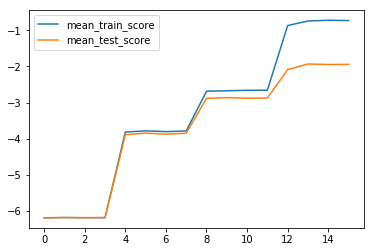

In [79]:
results[['mean_train_score','mean_test_score']].plot()

In [111]:
RF_model = RandomForestRegressor(n_estimators=30)
RF_model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=30)

In [112]:
y_pred = RF_model.predict(x_train)
rmse_RF = mean_squared_error(y_train,y_pred)**0.5
print('The RMSE on train data is: ', rmse_RF)

The RMSE on train data is:  0.714117855950547


In [113]:
y_pred = RF_model.predict(x_cv)
rmse_RF = mean_squared_error(y_cv,y_pred)**0.5
print('The RMSE on train data is: ', rmse_RF)

The RMSE on train data is:  2.1463060567127195


In [80]:
# Train a RF Regressor on best hyperparams using complete data and find the RMSE for train and test data.
RF_model = RandomForestRegressor(n_estimators=30)
RF_model.fit(X,Y)

RandomForestRegressor(n_estimators=30)

In [82]:
# Read Test data.
test_data = pd.read_csv('test.csv')
test_data.head()

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge
0,0,1,68.0,186.0,1.00,0.5,0.70,04/05/2017 05:49:46 AM,04/05/2017 05:54:03 AM,1.0,0.0,1.0,1.0,N,0.5,0.3
1,1,1,170.0,161.0,2.55,0.5,1.00,04/07/2017 08:57:27 AM,04/07/2017 09:16:00 AM,1.0,0.0,1.0,1.0,N,0.0,0.3
2,2,2,13.0,246.0,2.96,0.5,3.35,04/06/2017 08:06:41 AM,04/06/2017 08:21:33 AM,2.0,0.0,1.0,1.0,N,0.0,0.3
3,3,1,170.0,233.0,2.00,0.5,0.80,04/04/2017 08:31:34 AM,04/04/2017 08:37:21 AM,2.0,0.0,1.0,1.0,N,0.0,0.3
4,4,1,237.0,236.0,1.00,0.5,0.70,04/07/2017 10:54:06 AM,04/07/2017 11:00:59 AM,1.0,0.0,1.0,1.0,Y,0.0,0.3


In [83]:
X.head()

,driver tip,mta tax,distance,num passengers,toll amount,payment method,rate code,extra charges,improvement charge,pickup hr,trip_duration,velocity,time_of_day,trip_length
0,1.83,0.5,0.70,1.0,0.0,1.0,1.0,1.0,0.3,17,5.350000,0.130841,3,0
1,3.56,0.5,4.64,1.0,0.0,1.0,1.0,1.0,0.3,19,16.500000,0.281212,3,0
2,1.50,0.5,1.29,2.0,0.0,1.0,1.0,0.0,0.3,15,6.283333,0.205305,2,0
3,1.50,0.5,2.74,1.0,0.0,1.0,1.0,0.0,0.3,8,16.133333,0.169835,0,0
4,0.00,0.5,0.45,6.0,0.0,2.0,1.0,0.0,0.3,14,2.700000,0.166667,2,0


In [84]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154235 entries, 0 to 154234
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  154235 non-null  int64  
 1   vendor_id           154235 non-null  int64  
 2   pickup_loc          154235 non-null  float64
 3   drop_loc            154235 non-null  float64
 4   driver_tip          154235 non-null  float64
 5   mta_tax             154235 non-null  float64
 6   distance            154235 non-null  float64
 7   pickup_time         154235 non-null  object 
 8   drop_time           154235 non-null  object 
 9   num_passengers      154235 non-null  float64
 10  toll_amount         154235 non-null  float64
 11  payment_method      154235 non-null  float64
 12  rate_code           154235 non-null  float64
 13  stored_flag         154235 non-null  object 
 14  extra_charges       154235 non-null  float64
 15  improvement_charge  154235 non-nul

In [85]:
# Fill the 0 distance values with avg distance from train data.
# Another apporach would be to store the pickup and drop locations and the corresponding distance between them in dict
# and use that to fill in the missing distance values.
avg_distance = clean_data.distance.mean()

In [86]:
test_data['distance'].loc[test_data.distance==0] = avg_distance

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [87]:
# Preprocess the test data.
test_data.drop(['ID','vendor_id','stored_flag'],axis=1, inplace=True)
test_data['pickup_time'] = pd.to_datetime(test_data['pickup_time'])
test_data['drop_time'] = pd.to_datetime(test_data['drop_time'])
test_data['pickup hr'] = test_data['pickup_time'].dt.hour
test_data['trip_duration'] = test_data['drop_time'] - test_data['pickup_time']
test_data['trip_duration'] = pd.to_numeric(test_data['trip_duration'])/10**9/60   # Trip duration in minutes.
test_data['velocity'] = test_data['distance']/test_data['trip_duration']
test_data['time_of_day'] = test_data['pickup hr'].apply(convert_hr_time)
test_data['trip_length'] = test_data['distance'].apply(trip_length)

In [88]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154235 entries, 0 to 154234
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   pickup_loc          154235 non-null  float64       
 1   drop_loc            154235 non-null  float64       
 2   driver_tip          154235 non-null  float64       
 3   mta_tax             154235 non-null  float64       
 4   distance            154235 non-null  float64       
 5   pickup_time         154235 non-null  datetime64[ns]
 6   drop_time           154235 non-null  datetime64[ns]
 7   num_passengers      154235 non-null  float64       
 8   toll_amount         154235 non-null  float64       
 9   payment_method      154235 non-null  float64       
 10  rate_code           154235 non-null  float64       
 11  extra_charges       154235 non-null  float64       
 12  improvement_charge  154235 non-null  float64       
 13  pickup hr           154235 no

In [89]:
test_data.head()

,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,extra_charges,improvement_charge,pickup hr,trip_duration,velocity,time_of_day,trip_length
0,68.0,186.0,1.00,0.5,0.70,2017-04-05 05:49:46,2017-04-05 05:54:03,1.0,0.0,1.0,1.0,0.5,0.3,5,4.283333,0.163424,0,0
1,170.0,161.0,2.55,0.5,1.00,2017-04-07 08:57:27,2017-04-07 09:16:00,1.0,0.0,1.0,1.0,0.0,0.3,8,18.550000,0.053908,0,0
2,13.0,246.0,2.96,0.5,3.35,2017-04-06 08:06:41,2017-04-06 08:21:33,2.0,0.0,1.0,1.0,0.0,0.3,8,14.866667,0.225336,0,0
3,170.0,233.0,2.00,0.5,0.80,2017-04-04 08:31:34,2017-04-04 08:37:21,2.0,0.0,1.0,1.0,0.0,0.3,8,5.783333,0.138329,0,0
4,237.0,236.0,1.00,0.5,0.70,2017-04-07 10:54:06,2017-04-07 11:00:59,1.0,0.0,1.0,1.0,0.0,0.3,10,6.883333,0.101695,1,0


In [90]:
test_data.drop(['pickup_loc','drop_loc','pickup_time','drop_time'], axis=1, inplace=True)

In [91]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154235 entries, 0 to 154234
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   driver_tip          154235 non-null  float64
 1   mta_tax             154235 non-null  float64
 2   distance            154235 non-null  float64
 3   num_passengers      154235 non-null  float64
 4   toll_amount         154235 non-null  float64
 5   payment_method      154235 non-null  float64
 6   rate_code           154235 non-null  float64
 7   extra_charges       154235 non-null  float64
 8   improvement_charge  154235 non-null  float64
 9   pickup hr           154235 non-null  int64  
 10  trip_duration       154235 non-null  float64
 11  velocity            154235 non-null  float64
 12  time_of_day         154235 non-null  int64  
 13  trip_length         154235 non-null  int64  
dtypes: float64(11), int64(3)
memory usage: 16.5 MB


In [92]:
test_data['velocity'].loc[test_data.velocity==np.inf] = avg_velocity
test_data['trip_duration'].loc[test_data.trip_duration==0] = test_data['velocity'].loc[test_data.trip_duration==0]/test_data['distance'].loc[test_data.trip_duration==0]


C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [93]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154235 entries, 0 to 154234
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   driver_tip          154235 non-null  float64
 1   mta_tax             154235 non-null  float64
 2   distance            154235 non-null  float64
 3   num_passengers      154235 non-null  float64
 4   toll_amount         154235 non-null  float64
 5   payment_method      154235 non-null  float64
 6   rate_code           154235 non-null  float64
 7   extra_charges       154235 non-null  float64
 8   improvement_charge  154235 non-null  float64
 9   pickup hr           154235 non-null  int64  
 10  trip_duration       154235 non-null  float64
 11  velocity            154235 non-null  float64
 12  time_of_day         154235 non-null  int64  
 13  trip_length         154235 non-null  int64  
dtypes: float64(11), int64(3)
memory usage: 16.5 MB


In [94]:
# Prediction on test data using Random Forest Model.
y_pred_test = RF_model.predict(test_data)

In [103]:
test_data.columns

Index(['driver_tip', 'mta_tax', 'distance', 'num_passengers', 'toll_amount',
       'payment_method', 'rate_code', 'extra_charges', 'improvement_charge',
       'pickup hr', 'trip_duration', 'velocity', 'time_of_day', 'trip_length'],
      dtype='object')

In [104]:
X.columns

Index(['driver tip', 'mta tax', 'distance', 'num passengers', 'toll amount',
       'payment method', 'rate code', 'extra charges', 'improvement charge',
       'pickup hr', 'trip_duration', 'velocity', 'time_of_day', 'trip_length'],
      dtype='object')

### XGBoost 

In [95]:
from xgboost import XGBRegressor
params = {'n_estimators':[10,30,70,100],
         'learning_rate':[0.001,0.003,0.01,0.03,0.1,0.3],
         'reg_lambda':[0.1,0.3,1,3,10]}

xgb_model = XGBRegressor(subsample=0.6,
                        colsample_bytree=0.8,
                        objective='reg:squarederror',
                        eval_metric = 'rmse')
model = GridSearchCV(xgb_model,params,cv=4,
                    scoring='neg_root_mean_squared_error',
                    return_train_score=True,
                    n_jobs=-1)
model.fit(x_train,y_train)

GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    eval_metric='rmse', gamma=None, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_esti...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=0.6,
                                    tree_method=None, validate_paramet

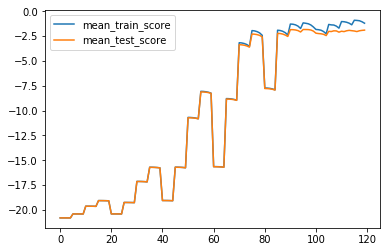

In [96]:
results = pd.DataFrame(model.cv_results_)
results[['mean_train_score','mean_test_score']].plot()

In [97]:
model.best_params_

{'learning_rate': 0.1, 'n_estimators': 100, 'reg_lambda': 0.1}

In [107]:
xgb_model = XGBRegressor(subsample=0.6,
                        colsample_bytree=0.8,
                        objective='reg:squarederror',
                        eval_metric = 'rmse',
                        learning_rate=0.1,
                        n_estimators=100,
                        reg_lambda=0.1)
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=6,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=0.1,
             scale_pos_weight=1, subsample=0.6, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [108]:
y_pred = xgb_model.predict(x_train)
xgb_rmse = mean_squared_error(y_train,y_pred)**0.5
print('RMSE using XGBoost Regressor on train data is: ', xgb_rmse)

RMSE using XGBoost Regressor on train data is:  1.1999729424712007


In [110]:
y_pred = xgb_model.predict(x_cv)
xgb_rmse = mean_squared_error(y_cv,y_pred)**0.5
print('RMSE using XGBoost Regressor on test data is: ', xgb_rmse)

RMSE using XGBoost Regressor on test data is:  1.745635971270988


In [105]:
test_data.columns = ['driver tip', 'mta tax', 'distance', 'num passengers', 'toll amount',
       'payment method', 'rate code', 'extra charges', 'improvement charge',
       'pickup hr', 'trip_duration', 'velocity', 'time_of_day', 'trip_length']

In [106]:
y_pred_test_xgb = xgb_model.predict(test_data)

In [114]:
submit_df = pd.read_csv('test.csv')

In [115]:
# Save files for submission
submit_df['total_amount'] = y_pred_test

In [116]:
submit_df.columns

Index(['ID', 'vendor_id', 'pickup_loc', 'drop_loc', 'driver_tip', 'mta_tax',
       'distance', 'pickup_time', 'drop_time', 'num_passengers', 'toll_amount',
       'payment_method', 'rate_code', 'stored_flag', 'extra_charges',
       'improvement_charge', 'total_amount'],
      dtype='object')

In [117]:
submit_df.drop(['vendor_id', 'pickup_loc', 'drop_loc', 'driver_tip', 'mta_tax',
       'distance', 'pickup_time', 'drop_time', 'num_passengers', 'toll_amount',
       'payment_method', 'rate_code', 'stored_flag', 'extra_charges',
       'improvement_charge'],axis=1,inplace=True)

In [121]:
submit_df.set_index('ID', inplace=True)

In [123]:
submit_df.to_csv('rf_submit.csv')

In [124]:
submit_df['total_amount'] = y_pred_test_xgb

In [126]:
submit_df.to_csv('xgb_submit.csv')